In [1]:
import numpy as np 
import pandas as pd



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('US_Accidents_March23.csv')

In [11]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [13]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [16]:
# Find the number of columns that are numeric 
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(numerics)
len(numeric_df.columns)

13

In [17]:
# Find number of missing values in dataset 
missing_percentages = round(df.isnull().sum().sort_values(ascending=True) /len(df) *100,2)

In [18]:
missing_per = missing_percentages[missing_percentages.values > 0]

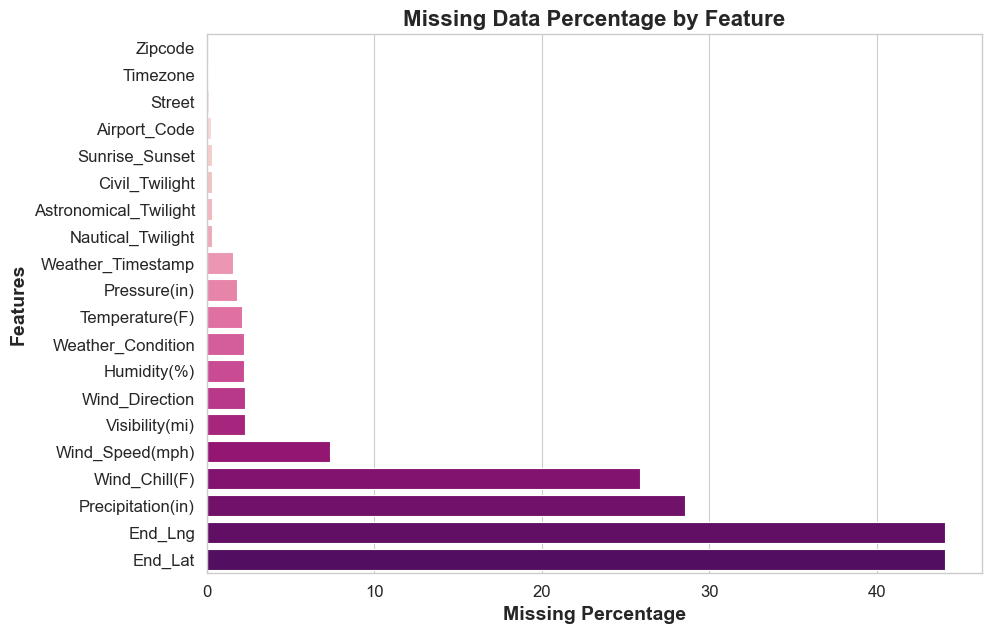

In [33]:
# Set the style and context for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")

# Create the bar plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=missing_per, y=missing_per.index, palette="RdPu")

# Customize labels and title
plt.xlabel('Missing Percentage', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.title('Missing Data Percentage by Feature', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [31]:
# Analyzing the data by state column
states = df['State'].value_counts().head() # The data indicates california is the highest accident state 

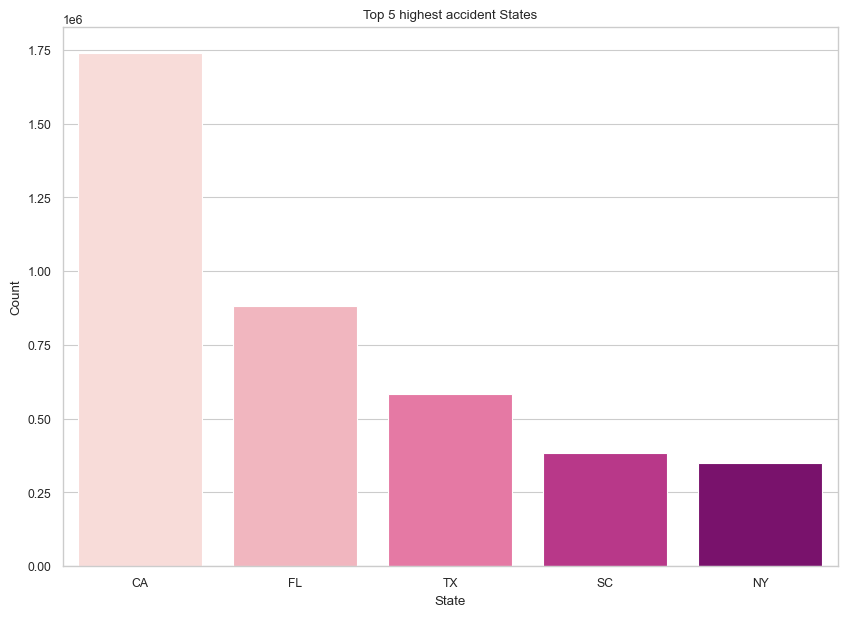

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(y=states , x = states.index, palette="RdPu")
plt.title('Top 5 highest accident States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [34]:
# Analyzing the cities columns 
cities_by_accidents = df['City'].value_counts()
df['City'].nunique()  

13678

In [41]:
city = cities_by_accidents.sort_values(ascending=False).head(20)

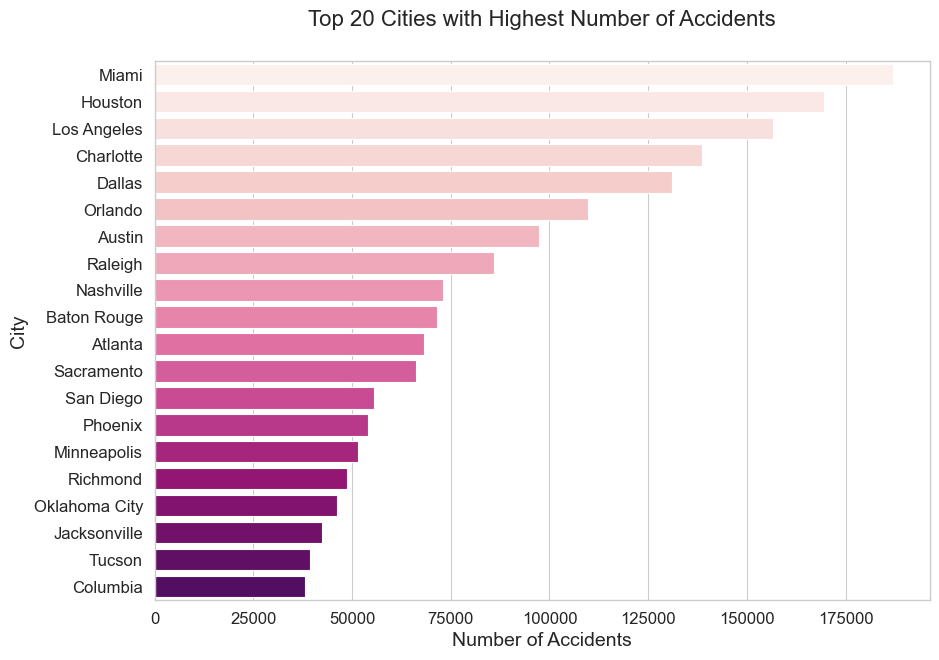

In [44]:
plt.figure(figsize=(10, 7))


# Plot the bar plot with the pastel palette
sns.barplot(x=city.values, y=city.index, palette="RdPu")

plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Top 20 Cities with Highest Number of Accidents', fontsize=16, y=1.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

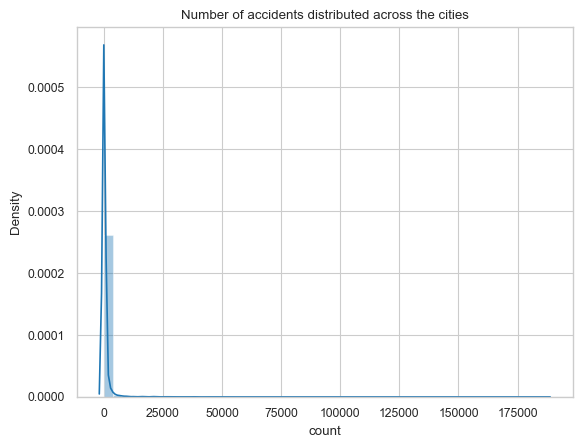

In [46]:
sns.set_style('whitegrid')
sns.distplot(cities_by_accidents) # Based on the diagram we see that the probability of accident occuring is very less 
plt.title("Number of accidents distributed across the cities")
plt.show()

In [47]:
# Analyzing the start time column 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

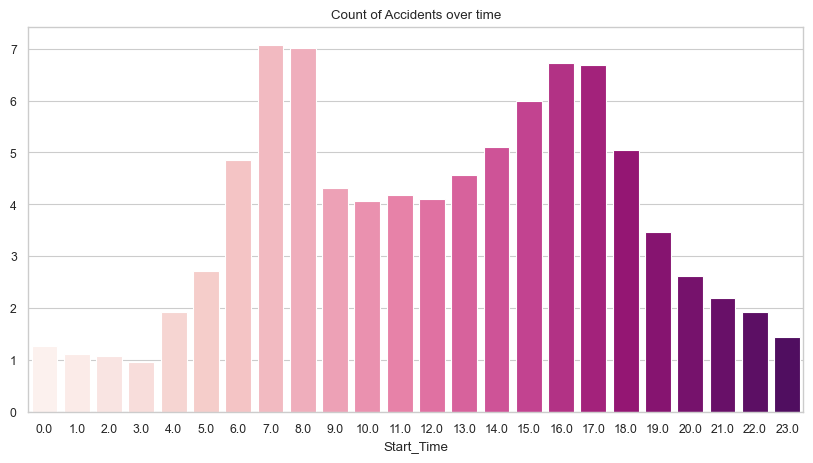

In [49]:
# Accident over time 
plt.figure(figsize=(10,5))
sns.barplot(x = df['Start_Time'].dt.hour.value_counts().index,y = (df['Start_Time'].dt.hour.value_counts().values/len(df))*100, palette="RdPu")
plt.title('Count of Accidents over time')
plt.show()

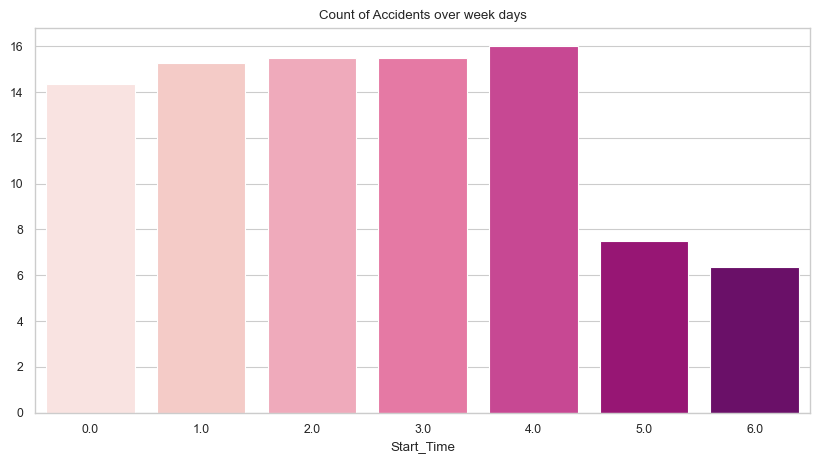

In [50]:
# Accident over day of week 
plt.figure(figsize=(10,5))
sns.barplot(x = df['Start_Time'].dt.day_of_week.value_counts().index,y = (df['Start_Time'].dt.day_of_week.value_counts().values/len(df))*100, palette="RdPu")
plt.title('Count of Accidents over week days')
plt.show()

In [51]:
# Analyze the distribution of accidents on saturday and sunday
weekends_data = df[(df['Start_Time'].dt.day_of_week == 5)|(df['Start_Time'].dt.day_of_week == 6)]

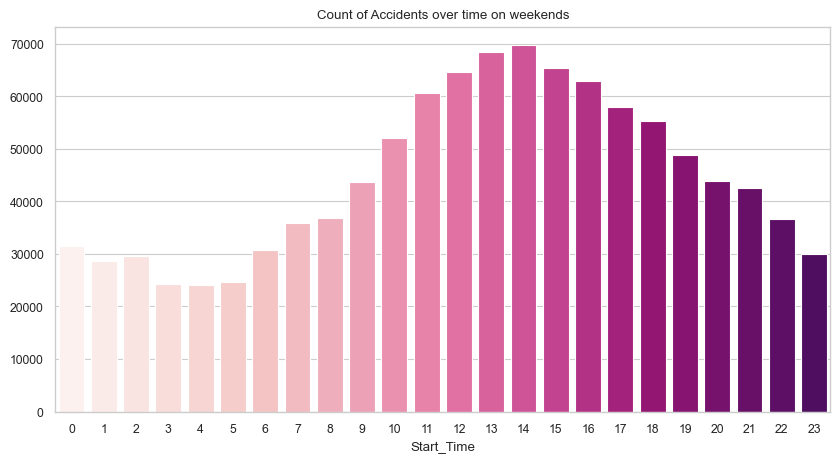

In [53]:
# Plotting the trend on weekends 
weekends_data['Start_Time'].dt.hour.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = weekends_data['Start_Time'].dt.hour.value_counts().index,y = weekends_data['Start_Time'].dt.hour.value_counts().values, palette="RdPu")
plt.title('Count of Accidents over time on weekends')
plt.show()

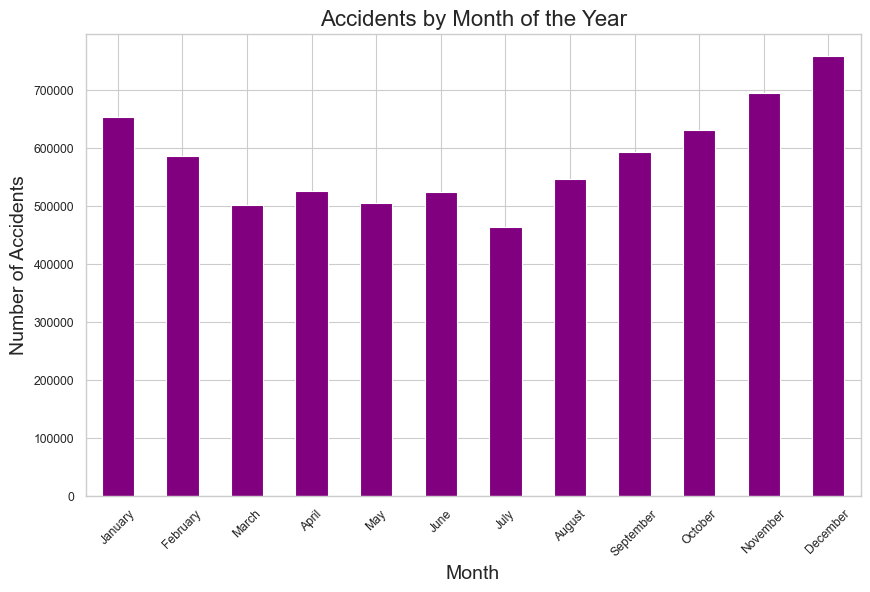

In [57]:
import calendar

# Get the count of accidents by month and sort by month index
monthly_accidents = df['Start_Time'].dt.month.value_counts().sort_index()

# Define the month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot the bar chart with month names as x-axis labels
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='purple')
plt.title('Accidents by Month of the Year', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(range(12), month_names, rotation=45)  # Set the month names as x-axis labels with rotation
plt.show()

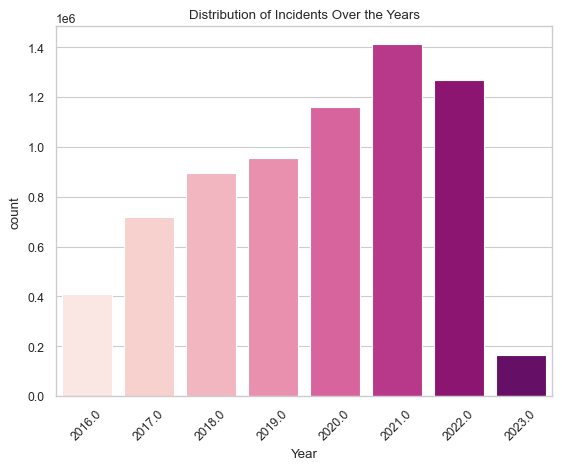

In [59]:
year = df['Start_Time'].dt.year

# Count the occurrences of each year and create a bar plot using Seaborn
sns.countplot(x= year, data=df, palette="RdPu")

# Set plot labels and title
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title('Distribution of Incidents Over the Years')

# Display the plot
plt.show()

In [60]:
severity_count = df['Severity'].value_counts()

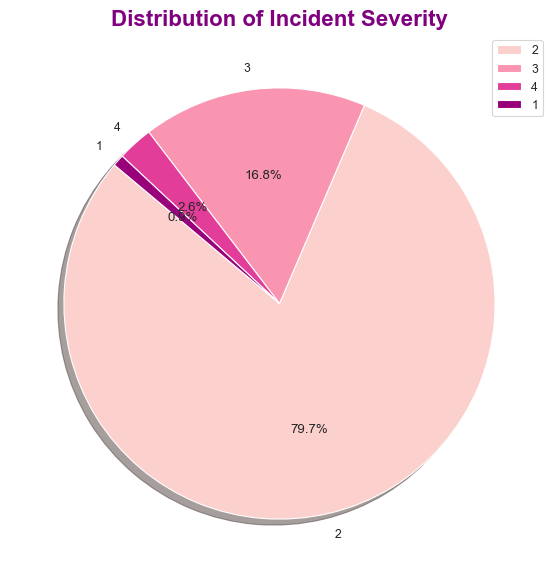

In [63]:
colors = sns.color_palette("RdPu", len(severity_count))

plt.figure(figsize=(10, 7))
plt.pie(severity_count, labels=severity_count.index, autopct='%1.1f%%',
        colors=colors, startangle=140, shadow=True)
plt.title('Distribution of Incident Severity', fontsize=16, color='purple', weight='bold')
plt.legend()
plt.show()

## Observations

1. ### State-wise Analysis:
   California, Florida, Texas, South Carolina, and New York are the top 5 states with the highest number of accidents. This suggests that these states may have specific factors contributing to increased accident rates, such as population density, road infrastructure, or weather conditions.
2. ### City Breakdown:
   Miami stands out as the city with the highest number of accidents among the top 20 cities analyzed. Conversely, Columbia has the lowest number of accidents among this group. This variation in accident rates between cities may be influenced by factors such as population density, traffic congestion, or enforcement of traffic regulations.
3. ### Peak Hour Findings:
   The time window of 7-8 AM experiences the highest number of accidents, indicating a peak in accident occurrence during morning rush hours. This highlights the importance of increased vigilance and caution for drivers during this time to mitigate accident risks.
4. ### Impact of Severity 2 and 4 Accidents:
   Severity 2 and 4 accidents have the most significant impact on traffic. While severity 2 accidents have a high frequency, severity 4 accidents, despite being less frequent, have a greater impact on traffic conditions. This suggests that severity 4 accidents may involve more severe damage or road closures, leading to longer traffic delays.
5. ### Seasonal Variation:
   Accidents are more prevalent in December, while the lowest number of accidents occurs in July. This seasonal trend may be influenced by various factors such as weather conditions, holiday travel patterns, or changes in road usage throughout the year.
6. ### Trend in Accident Counts:
    The year 2021 shows a higher number of accidents compared to other years, indicating a rising trend in accident occurrence over time. This trend may be attributed to factors such as changes in population, increased vehicle usage, or shifts in driving behavior.
   
Overall, these insights provide valuable information for understanding patterns and trends in traffic accidents, which can help inform strategies for accident prevention and road safety initiatives.afety initiatives.